# ANN/MLP จำแนกชนิดดอก Iris (Classification)
Artificial Neural Network ด้วย MLP Scikit-learn จำแนกดอก Iris (3 Class)

- ตรวจสอบข้อมูลสูญหาย (Missing Values)
- เข้ารหัส Label Encoding เปลี่ยน Label ให้เป็นตัวเลข
- ปรับสเกลข้อมูล (Feature scaling)
- Train & Evaluate
- Prediction

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Dataset

In [2]:
df = sns.load_dataset('iris')
df.head()
df.sample(5)

,sepal_length,sepal_width,petal_length,petal_width,species
54,6.5,2.8,4.6,1.5,versicolor
123,6.3,2.7,4.9,1.8,virginica
4,5.0,3.6,1.4,0.2,setosa
73,6.1,2.8,4.7,1.2,versicolor
86,6.7,3.1,4.7,1.5,versicolor


In [3]:
df.isnull().sum()   # มี Missing values?

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [4]:
pd.unique(df.species)

array(['setosa', 'versicolor', 'virginica'], dtype=object)

## Label Encoding


In [5]:
y, class_names = pd.factorize(df.species, sort=True) 

In [6]:
y[40:60]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
      dtype=int64)

In [7]:
class_names

Index(['setosa', 'versicolor', 'virginica'], dtype='object')

In [8]:
pd.unique(y)

array([0, 1, 2], dtype=int64)

## Data Visualization

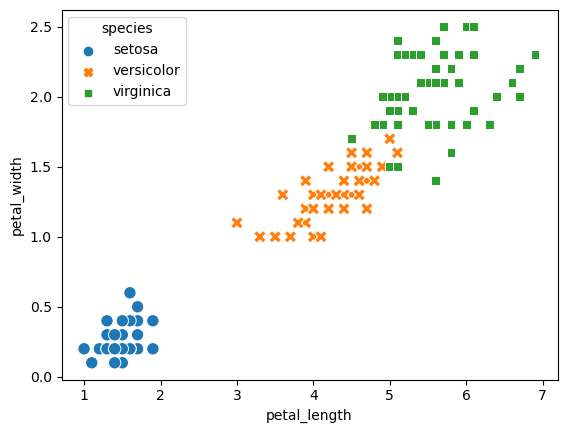

In [9]:
sns.scatterplot(x='petal_length', y ='petal_width', data=df, hue='species', style='species', s=80)
plt.show()

In [ ]:
sns.pairplot(df, hue='species')
plt.show()

## Feature Scaling

In [ ]:
X = df.drop('species', axis=1)   # Feature
X.head()

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X_sc = sc.fit_transform(X)
X_sc[:5]

## Cross validation

In [ ]:
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score

# model = SVC(kernel='linear') # 
# model = SVC() # 
model = MLPClassifier(hidden_layer_sizes=(50), max_iter=2000, random_state=1)  # 4 5 50

cvs = cross_val_score(model, X_sc, y, cv=5)  # no need to use model.fit
print('cross val scores {}'.format(cvs.round(2)))
print('Average (%) = {:.2f}' .format(cvs.mean() * 100 ))

## Train-test Split

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_sc, y, test_size=0.25, random_state=20) # 1

len(X_train),len(X_test)

In [ ]:
X_train[:5]

In [ ]:
y_train[:5]

## Model

In [ ]:
from sklearn.neural_network import MLPClassifier

model = MLPClassifier(hidden_layer_sizes=(50), max_iter=2000, random_state=1)  # 
model.fit(X_train, y_train)

In [ ]:
[coef.shape for coef in model.coefs_]

## Loss Curve

In [ ]:
plt.figure(figsize=(5,3))
plt.title('Loss curve')
plt.xlabel('Iteration')
plt.plot(model.loss_curve_)
plt.tight_layout()
plt.show()

## Evaluation

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

y_predict = model.predict(X_test)

print('Score -> {:.4f}' . format(model.score(X_test, y_test)))
print(classification_report(y_test, y_predict, target_names=class_names))
print(confusion_matrix(y_test, y_predict))

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_predict)   ## <-- 
ConfusionMatrixDisplay(cm, display_labels=class_names).plot()
plt.title('Confusion Matrix')
plt.show()

## Prediction

In [ ]:
# X_new = [[5.1, 3.5, 3.4, 1.4]]
# X_new = [[6.7, 3.5, 6.3, 1.8]] 

X_new = [[6.1, 3.5, 3.9, 1.6]]

X_new_sc = sc.transform(X_new)
X_new_sc

In [ ]:
y_pred = model.predict(X_new_sc)
y_pred

In [ ]:
print(class_names[y_pred][0])

## Decision Regions

In [ ]:
from mlxtend.plotting import plot_decision_regions

value = 0
width = 9.5

ax = plot_decision_regions(X_test, np.array(y_test), clf=model, feature_index=[2, 3],  
                      filler_feature_values={0: value, 1: value},
                      filler_feature_ranges={0: width, 1: width},
                      legend=2) 

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, class_names, framealpha=0.5)

plt.title('MLP: Iris Prediction')

plt.xticks([])
plt.yticks([])
plt.xlabel('petal_length')
plt.ylabel('petal_width')

plt.scatter(X_new_sc[:,2], X_new_sc[:,3], marker='o', s=130, c='b')
plt.show()

In [ ]:
# PCA (Principal component analysis)
from sklearn.decomposition import PCA
from sklearn.neural_network import MLPClassifier

pca = PCA(n_components=2)

X_pca = pca.fit_transform(X)
X_train, X_test,y_train,y_test = train_test_split(X_pca, y, test_size=0.25, random_state=20)  # 20 1

model = MLPClassifier(hidden_layer_sizes=(50), max_iter=2000, random_state=1)  # 
model.fit(X_train, y_train)

In [ ]:
# Training data points
from mlxtend.plotting import plot_decision_regions

ax = plot_decision_regions(np.array(X_train), y_train,   # <<---
                      clf=model, legend=2) 

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, class_names, framealpha=0.5, loc='upper left')

plt.title('MLP: Training data')
plt.xticks()
plt.yticks()
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.show()

In [ ]:
# Test data points and prediction
# from mlxtend.plotting import plot_decision_regions

ax = plot_decision_regions(np.array(X_test), y_test,   # <<--- 
                      clf=model, legend=2) 

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, class_names, framealpha=0.5, loc='upper left')

plt.title('MLP: Test data & Prediction')
plt.scatter(X_new_sc[:,2], X_new_sc[:,3], marker='o', s=130, c='b')

plt.xticks()
plt.yticks()
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.show()

# ปัญหา Missing value 
Train-test -> จำลองทำให้ข้อมูลมี Missing Values (NaN) 

In [ ]:
X_train[:5]

In [ ]:
X_train[0][0] = np.nan

In [ ]:
X_train[:5]

In [ ]:
np.isnan(X_train).sum()  # Missing Value 

In [ ]:
# Train the model

In [ ]:
np.nanmean(X_train, axis=0)   # หาค่าเฉลี่ย

In [ ]:
X_train[0][0] = 0.0249977       # เติมค่าเฉลี่ยแทนที่ Missing Value (NaN)

In [ ]:
X_train[0][0] = np.nanmean(X_train, axis=0)[0]

In [ ]:
X_train[:5]

In [ ]:
# Train the model

In [ ]:
## test

In [ ]:
df.describe()

In [ ]:
np.nanmean(X, axis=0)

In [ ]:
X_train[:,0]# .shape

In [ ]:
np.nanmean(X_train[:,0])

In [ ]:
df.loc[0,'sepal_length'] = None

In [ ]:
df.describe()
df.head(4)

In [ ]:
df.isnull().sum()

In [ ]:
# re-run above code